# Cholesky decomposition

| Who  | Mail | Date | What |
| ---  | ---   | --- | ---      |
|Diego Andrés Alvarez Marín | <daalvarez@unal.edu.co>  | March 19th, 2025 | Initial code |

The Cholesky decomposition is a method for efficiently solving linear systems when the coefficient matrix is symmetric positive definite. For a symmetric positive definite matrix $\boldsymbol{A}$, the Cholesky decomposition gives us:

$$\boldsymbol{A} = \boldsymbol{L}\boldsymbol{L}^T$$

where $\boldsymbol{L}$ is a lower triangular matrix with positive diagonal entries.

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
from numpy.linalg import norm
from numpy.random import rand
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import time

# Increase the number of digits shown when an array is printed
np.set_printoptions(linewidth=200)

## 1. Mathematical Background

The algorithm for computing the Cholesky decomposition is as follows:

For a symmetric positive definite matrix $\boldsymbol{A}$ of size $n \times n$, the elements of $\boldsymbol{L}$ can be computed as:

$L_{ii} = \sqrt{A_{ii} - \sum_{k=1}^{i-1} L_{ik}^2}$

$L_{ji} = \frac{1}{L_{ii}} \left(A_{ji} - \sum_{k=1}^{i-1} L_{jk}L_{ik}\right) \qquad \text{for } j > i.$

## 2. Implementation of the Gauss-Jordan elimination method

In [2]:
def cholesky_decomposition(A):
    """
    Compute the Cholesky decomposition of a symmetric positive definite matrix.
    
    Parameters:
    A (numpy.ndarray): A symmetric positive definite matrix
    
    Returns:
    L (numpy.ndarray): Lower triangular matrix such that A = L @ L.T

    Raises:
    ValueError: If matrix is not symmetric or not positive definite
    """
    n = A.shape[0]
    
    # Check if the matrix is symmetric
    if not np.allclose(A, A.T):
        raise ValueError("Matrix must be symmetric")
    
    # Initialize L as a zero matrix
    L = np.zeros_like(A, dtype=float)
    
    # Compute L column by column
    for i in range(n):
        # Compute diagonal element
        Lii2 = A[i, i] - np.sum(L[i, :i]**2)

        # Check if the matrix is positive definite
        if Lii2 <= 0:
            raise ValueError(f"Matrix is not positive definite.")
        
        L[i, i] = np.sqrt(Lii2)
        
        # Compute lower off-diagonal elements
        for j in range(i+1, n):
            L[j, i] = (A[j, i] - np.sum(L[j, :i] * L[i, :i])) / L[i, i]
            #sum_k = sum(L[j, k] * L[i, k] for k in range(j))
            #L[j, i] = (A[j, i] - sum_k) / L[i, i]
    return L

## 3. Example

Let's test our implementation with a simple example:

### Test 1: Positive definite matrix

In [3]:
# Create a symmetric positive definite matrix
n = 4
A_random = rand(n, n)
A = A_random @ A_random.T  # This ensures the matrix is symmetric positive definite

print("Original matrix A:")
print(A)

print("\nVerify A is symmetric:", np.allclose(A, A.T))

# Compute Cholesky decomposition
try:
    L = cholesky_decomposition(A)
    print("\nComputed L:")
    print(L)    

    # Verify the decomposition
    print("\nVerify A = L@L.T:", np.allclose(A, L@L.T))
except ValueError as error:
    print(f"Error: {error}")

Original matrix A:
[[1.39550348 1.14801866 1.03972534 1.66750926]
 [1.14801866 1.20865811 0.70298574 1.55821172]
 [1.03972534 0.70298574 0.97838292 1.08381923]
 [1.66750926 1.55821172 1.08381923 2.31713076]]

Verify A is symmetric: True

Computed L:
[[ 1.1813143   0.          0.          0.        ]
 [ 0.97181475  0.51403717  0.          0.        ]
 [ 0.88014286 -0.29637948  0.34042719  0.        ]
 [ 1.41157121  0.36267027 -0.15003813  0.41298463]]

Verify A = L@L.T: True


### Test 2: Non-positive definite matrix

In [4]:
A_npd = A.copy()
A_npd[0,0] *= -1  # Negative diagonal element

print("Original matrix A:")
print(A_npd)

print("\nVerify A is symmetric:", np.allclose(A_npd, A_npd.T))

# Compute Cholesky decomposition
try:
    L = cholesky_decomposition(A_npd)
    print("\nComputed L:")
    print(L)    

    # Verify the decomposition
    print("\nVerify A = L@L.T:", np.allclose(A_npd, L@L.T))
except ValueError as error:
    print(f"Error: {error}")

Original matrix A:
[[-1.39550348  1.14801866  1.03972534  1.66750926]
 [ 1.14801866  1.20865811  0.70298574  1.55821172]
 [ 1.03972534  0.70298574  0.97838292  1.08381923]
 [ 1.66750926  1.55821172  1.08381923  2.31713076]]

Verify A is symmetric: True
Error: Matrix is not positive definite.


Using our function `cholesky_decomposition()` we can create another function to check if a matrix is positive definite

In [5]:
def is_positive_definite(A):
    """
    Check if a matrix is positive definite using the Cholesky decomposition.
    
    Parameters:
    A (numpy.ndarray): A symmetric matrix
    
    Returns:
    bool: True if the matrix is positive definite, False otherwise
    """
    try:
        cholesky_decomposition(A)
        return True
    except ValueError:
        return False

In [6]:
print("Original matrix A:")
print(A)

print("\nVerify A is positive definite matrix:", is_positive_definite(A))

# Let's also check using NumPy's eigenvalues
eigenvalues = np.linalg.eigvalsh(A)
print(f"\nmin eigenvalue = {min(eigenvalues):.6f}")

Original matrix A:
[[1.39550348 1.14801866 1.03972534 1.66750926]
 [1.14801866 1.20865811 0.70298574 1.55821172]
 [1.03972534 0.70298574 0.97838292 1.08381923]
 [1.66750926 1.55821172 1.08381923 2.31713076]]

Verify A is positive definite matrix: True

min eigenvalue = 0.028276


## 4. Comparison with NumPy's Implementation

Now, let's compare our implementation with NumPy's built-in function:

In [7]:
# NumPy's implementation
L_numpy = np.linalg.cholesky(A)

print("NumPy's L:")
print(L_numpy)

print("\nIs our implementation close to NumPy's?", np.allclose(L, L_numpy))

NumPy's L:
[[ 1.1813143   0.          0.          0.        ]
 [ 0.97181475  0.51403717  0.          0.        ]
 [ 0.88014286 -0.29637948  0.34042719  0.        ]
 [ 1.41157121  0.36267027 -0.15003813  0.41298463]]

Is our implementation close to NumPy's? True


## 5. Solving Linear Systems Using Cholesky Decomposition

One of the main applications of the Cholesky decomposition is solving linear systems of the form $Ax = b$, where $A$ is symmetric positive definite.

Given $\boldsymbol{A} = \boldsymbol{L}\boldsymbol{L}^T$, we can solve $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$ by:
1. Solving $\boldsymbol{L}\boldsymbol{y} = \boldsymbol{b}$ for $\boldsymbol{y}$
2. Solving $\boldsymbol{L}^T\boldsymbol{x} = \boldsymbol{y}$ for $\boldsymbol{x}$

Let's implement this:

In [8]:
def solve_using_cholesky(A, b):
    """
    Solve the linear system Ax = b using Cholesky decomposition.
    
    Parameters:
    A (numpy.ndarray): Symmetric positive definite matrix
    b (numpy.ndarray): Right-hand side vector
    
    Returns:
    x (numpy.ndarray): Solution vector
    """
    # Compute the Cholesky decomposition
    L = cholesky_decomposition(A)
    
    # Solve Ly = b for y (forward substitution)
    n = A.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.sum(L[i, :i] * y[:i])) / L[i, i]
    
    # Solve L^Tx = y for x (backward substitution)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(L[i+1:, i] * x[i+1:])) / L[i, i]
    
    return x

Let's test our solver with a simple example

In [9]:
# Create a random right-hand side vector
b = rand(n)

# Solve the system using our implementation
x_our = solve_using_cholesky(A, b)

# Solve the system using NumPy
x_numpy = np.linalg.solve(A, b)

print("Our solution x:")
print(x_our)
print("\nNumPy's solution x:")
print(x_numpy)
print("\nIs our solution close to NumPy's?", np.allclose(x_our, x_numpy))

# Verify the solution
print("\nVerify A@x = b:", np.allclose(A@x_our, b))

Our solution x:
[-14.43176439   5.33161567   9.93310978   2.32361849]

NumPy's solution x:
[-14.43176439   5.33161567   9.93310978   2.32361849]

Is our solution close to NumPy's? True

Verify A@x = b: True


## 6. Large System Performance

Now, let's compare the performance of our implementation with NumPy's for matrices of different sizes:

In [10]:
def compare_performance(sizes):
    """
    Compare the performance of our Cholesky implementation with NumPy's.
    """
    ch_times = []
    np_times = []

    # Create a seed for reproducibility
    np.random.seed(42)
    
    for n in sizes:
        # Create a random symmetric positive definite matrix
        # Create lower triangular matrix with random values below diagonal
        L = np.tril(np.random.randn(n, n), -1)
    
        # Ensure positive diagonal entries (crucial for positive definiteness)
        np.fill_diagonal(L, np.abs(np.random.randn(n)) + 100)
    
        # Compute positive definite matrix
        A = L @ L.T
        
        # Time our implementation
        start_time = time.time()
        L_our = cholesky_decomposition(A)
        ch_time = time.time() - start_time
        ch_times.append(ch_time)
        
        # Time NumPy's implementation
        start_time = time.time()
        L_numpy = np.linalg.cholesky(A)
        np_time = time.time() - start_time
        np_times.append(np_time)

    # Pack all stats in a pandas' dataframe
    df = pd.DataFrame({
        'Size':            sizes,
        'Our time':        ch_times,
        'NumPy time':      np_times
    })
    return df

In [11]:
# Compare performance for matrices of different sizes
print("\n\nPerformance Comparison:")
sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
df = compare_performance(sizes)
display(df)



Performance Comparison:


,Size,Our time,NumPy time
0,10,0.000408,0.000036
1,20,0.001182,0.000094
2,50,0.018180,0.000083
3,100,0.082976,0.000222
4,200,0.187405,0.000557
5,500,0.581193,0.002339
6,1000,2.650949,0.012469
7,2000,12.833083,0.054615
8,5000,92.443198,0.392605


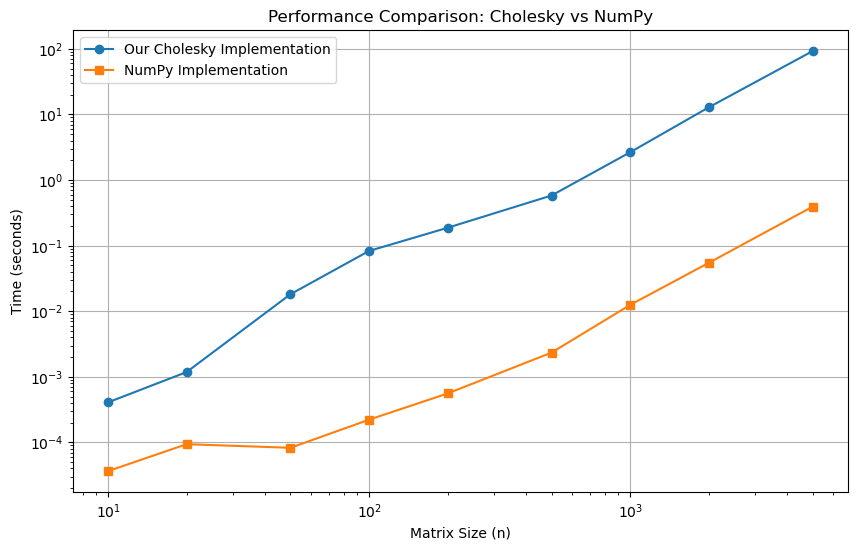

In [12]:
# Plot the performance comparison
ch_times = df['Our time']
np_times = df['NumPy time']

plt.figure(figsize=(10, 6))
plt.plot(sizes, ch_times, 'o-', label='Our Cholesky Implementation')
plt.plot(sizes, np_times, 's-', label='NumPy Implementation')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Cholesky vs NumPy')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

#k, log_a = np.polyfit(np.log(sizes), np.log(ch_times), 1)
#plt.plot(sizes, np.exp(log_a)*sizes**k)

plt.show()

When data follows a straight line in a log-log plot, it indicates that the relationship between the two variables adheres to a *power law*. Specifically, the data can be modeled by an equation of the form $y = ax^k$. To show that, take the logarithm of both sides of the power law equation transforms it into:
$$
   \log(y) = \log(a) + k\log(x)
$$
This is a linear equation where $k$ is the slope of the line and $\log(a)$ is the intercept.

In [13]:
k, log_a = np.polyfit(np.log(sizes), np.log(ch_times), 1)
print("k =", k)
print("a =", np.exp(log_a))

k = 1.926877355794774
a = 5.891425619484933e-06


The computational complexity of the Cholesky decomposition is $O(n^3/3)$ for an $n \times n$ matrix, which is about 3 times faster than LU decomposition.

## 7. Numerical Stability

The Cholesky decomposition is known for its numerical stability for symmetric positive definite matrices. Let's examine this property:

## 8. Application: Solving a Poisson Equation

Let's apply the Cholesky decomposition to solve a Poisson equation, which is a common application in numerical methods.

The 1D Poisson equation is given by:

$\frac{d^2 u}{dx^2} = f(x)$

With boundary conditions $u(0) = u(1) = 0$.

Using finite differences, we get a system of linear equations $Au = f$ where $A$ is a tridiagonal matrix, which is symmetric positive definite.

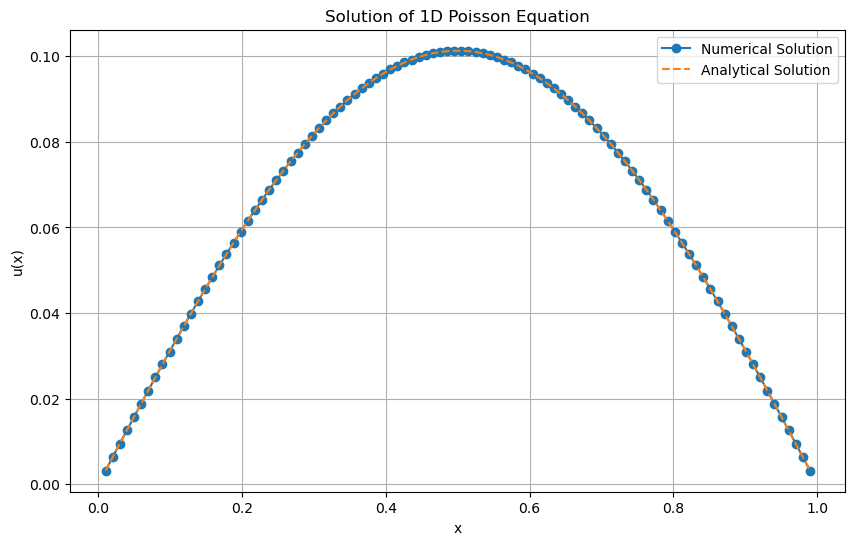

Maximum error: 8.168541e-06


In [14]:
def solve_poisson_1d(n, f):
    """
    Solve the 1D Poisson equation using finite differences and Cholesky decomposition.
    
    Parameters:
    n (int): Number of interior grid points
    f (function): Right-hand side function
    
    Returns:
    x (numpy.ndarray): Grid points
    u (numpy.ndarray): Solution
    """
    # Create grid
    h = 1.0 / (n + 1)
    x = np.linspace(h, 1-h, n)
    
    # Create system matrix A
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2
        if i > 0:
            A[i, i-1] = -1
        if i < n-1:
            A[i, i+1] = -1
    A = A / h**2
    
    # Create right-hand side vector
    b = np.array([f(xi) for xi in x])
    
    # Solve using Cholesky decomposition
    u = solve_using_cholesky(A, b)
    
    return x, u

# Define the right-hand side function
def f(x):
    return np.sin(np.pi * x)

# Solve the Poisson equation
n = 100
x, u = solve_poisson_1d(n, f)

# Analytical solution
u_analytical = np.sin(np.pi * x) / (np.pi**2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, u, 'o-', label='Numerical Solution')
plt.plot(x, u_analytical, '--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution of 1D Poisson Equation')
plt.legend()
plt.grid(True)
plt.show()

# Compute and print the error
error = np.max(np.abs(u - u_analytical))
print(f"Maximum error: {error:.6e}")

## 9. Advantages and Limitations

### Advantages of Cholesky decomposition:
* The Cholesky decomposition is approximately twice as efficient as LU decomposition for symmetric positive definite matrices, making it the preferred choice for such problems.
* It's also numerically stable, provided the matrix is well-conditioned.
* This is the a good method when using symmetric positive definite matrices common in physical problems
* It is useful to determine if a matrix is positive definite.

### Limitations of Cholesky decomposition:
* Exclusively applicable to symmetric positive-definite matrices. Failure occurs if the matrix is indefinite or ill-conditioned, leading to negative square roots during decomposition.